PROGRAM EKSPERIMEN KOMPLEKSITAS ALGORITMA
Dengan Analisis Kesesuaian Teori dan Penyimpanan Grafik

MELAKUKAN EKSPERIMEN 1: FUNGSI O(log n)
EKSPERIMEN 1: FUNGSI O(log n)

Eksperimen untuk n = 2¹⁰⁰
Run #    Time (µs)   
--------------------
1        9.25        
2        9.37        
3        9.24        
4        8.99        
5        9.03        
--------------------
Rata-rata 9.18        
Std Dev  0.14        

Eksperimen untuk n = 2¹³⁰
Run #    Time (µs)   
--------------------
1        12.47       
2        12.56       
3        12.65       
4        12.56       
5        12.53       
--------------------
Rata-rata 12.55       
Std Dev  0.06        

Eksperimen untuk n = 2¹⁶⁰
Run #    Time (µs)   
--------------------
1        16.07       
2        16.29       
3        16.13       
4        16.18       
5        16.12       
--------------------
Rata-rata 16.16       
Std Dev  0.07        

Eksperimen untuk n = 2¹⁹⁰
Run #    Time (µs)   
--------------------
1        20.34       
2

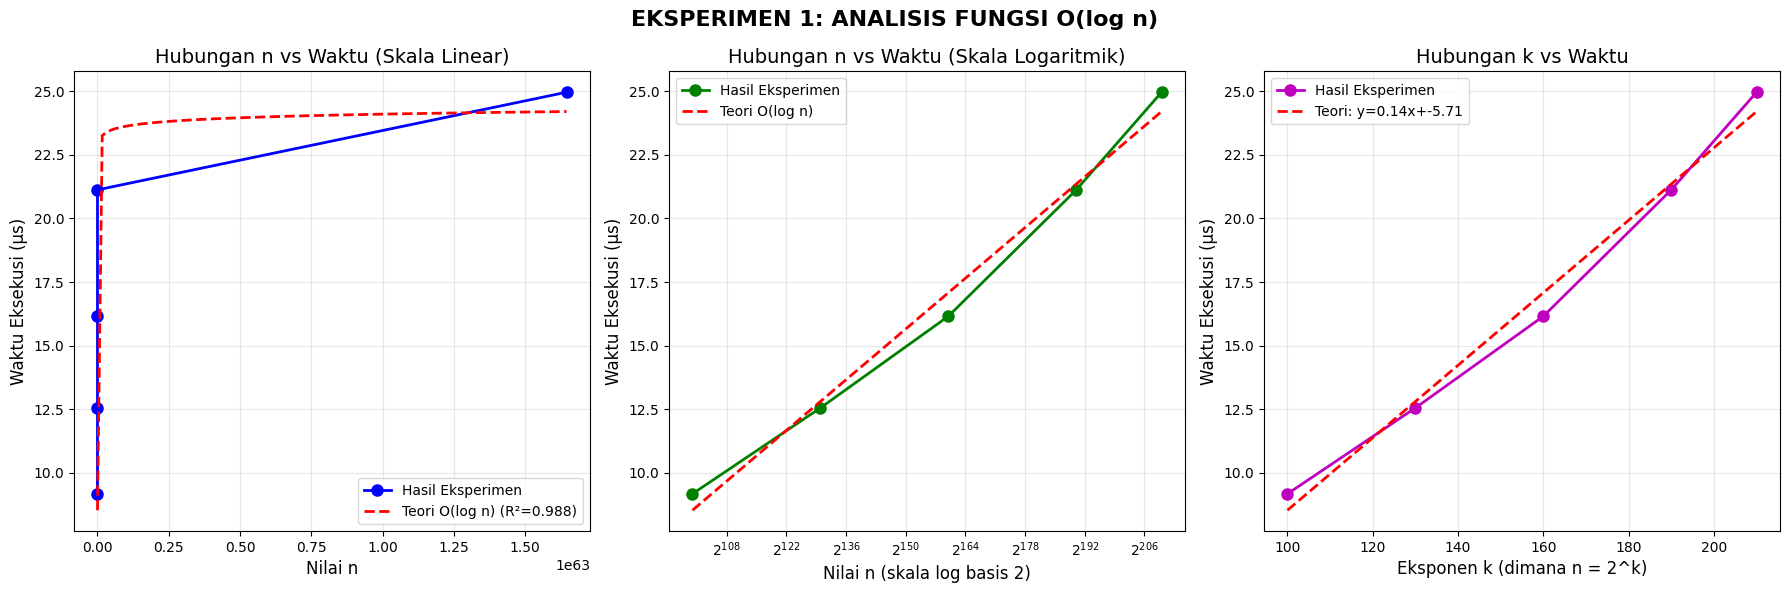


MELAKUKAN EKSPERIMEN 2: PERBANDINGAN O(n) vs O(n log n)
EKSPERIMEN 2: PERBANDINGAN O(n) vs O(n log n)

Eksperimen untuk n = 10¹
Run #    O(n) Time (µs)  O(n log n) Time (µs)
--------------------------------------------------
1        0.67            1.81                
2        0.60            1.84                
3        0.56            1.87                
4        0.48            1.83                
5        0.48            1.70                
--------------------------------------------------
Rata-rata 0.56            1.81                
Std Dev  0.07            0.06                

Eksperimen untuk n = 10²
Run #    O(n) Time (µs)  O(n log n) Time (µs)
--------------------------------------------------
1        2.20            34.86               
2        2.20            34.61               
3        2.03            34.76               
4        2.14            34.90               
5        2.16            34.78               
-----------------------------------------------

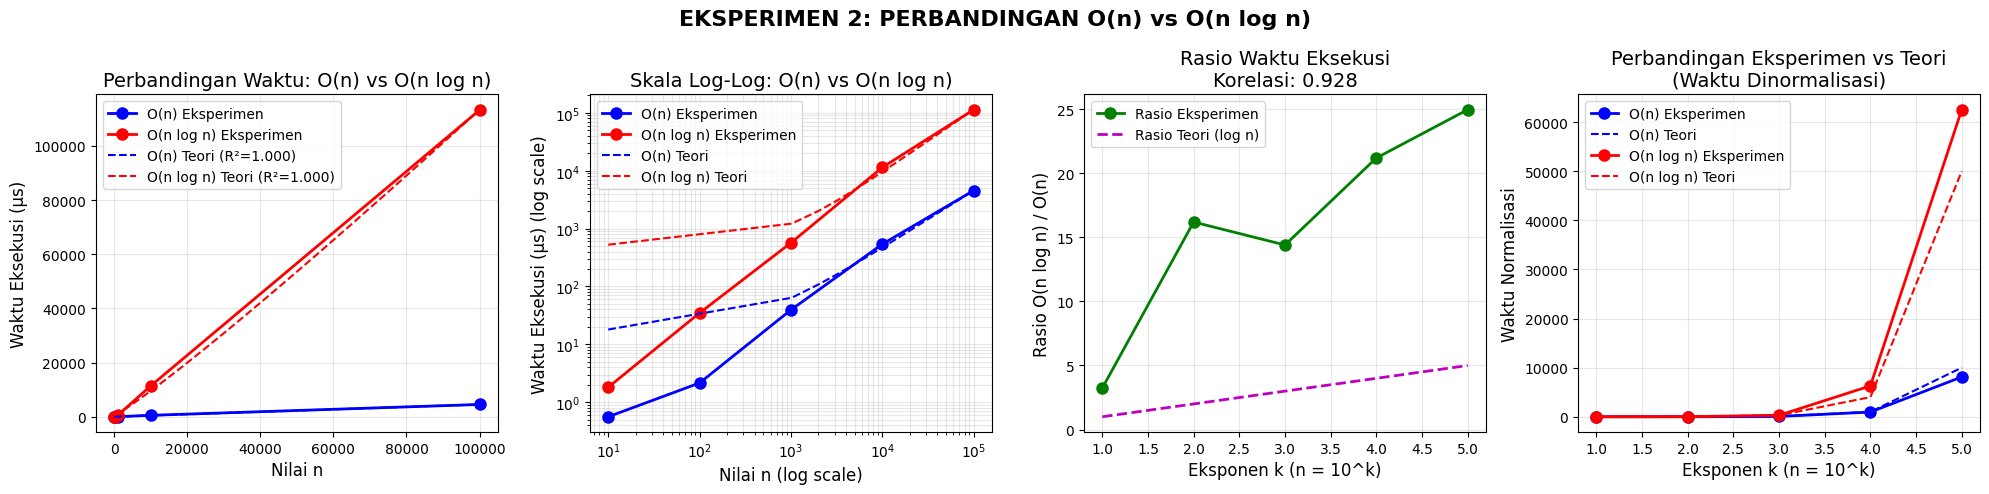


SELESAI! Semua grafik telah disimpan ke file PNG.


In [17]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Atur batas rekursi
sys.setrecursionlimit(10000)

# Fungsi untuk konversi ke superskrip
SUPERSCRIPT_MAP = {
    "0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴",
    "5": "⁵", "6": "⁶", "7": "⁷", "8": "⁸", "9": "⁹"
}
TRANS_TABLE = str.maketrans(SUPERSCRIPT_MAP)

def SUP(text):
    """Converts digits in a string to superscript."""
    return str(text).translate(TRANS_TABLE)

# ==================== EKSPERIMEN 1 ====================

def func1(n):
    """Fungsi O(log n)."""
    # if (n==1):
    #     return 0
    # else:
    #     return 1+func1(n//2)
    k = 0
    while n > 1:
        n = n // 2
        k += 1
    return k

def eksperimen1(k_values):
    """Menjalankan eksperimen 1 untuk daftar k_values."""
    print("=" * 60)
    print("EKSPERIMEN 1: FUNGSI O(log n)")
    print("=" * 60)

    hasil_eksperimen = []

    for k in k_values:
        n = 2**k
        print(f"\nEksperimen untuk n = 2{SUP(str(k))}")
        print(f"{'Run #':<8} {'Time (µs)':<12}")
        print("-" * 20)

        t_avg = 0
        times = []

        for i in range(7):
            start = time.perf_counter()
            result = func1(n)
            end = time.perf_counter()
            t = (end - start) * 1_000_000
            if i>1:
              times.append(t)
              t_avg += t/5
              print(f"{i-1:<8} {t:<12.2f}")

        std_dev = np.std(times) if len(times) > 1 else 0

        print("-" * 20)
        print(f"{'Rata-rata':<8} {t_avg:<12.2f}")
        print(f"{'Std Dev':<8} {std_dev:<12.2f}")

        # Simpan hasil
        hasil_eksperimen.append((k, n, t_avg, std_dev))

    print("\n" + "=" * 60)
    return hasil_eksperimen

def tabel_eksperimen1(data):
    """Menampilkan tabel hasil eksperimen 1."""
    print("\n" + "=" * 80)
    print("HASIL EKSPERIMEN WAKTU EKSEKUSI FUNGSI O(log n)")
    print("=" * 80)
    print(f"{'k':<8} {'n = 2^k':<20} {'Waktu (µs)':<15} {'Std Dev':<12} {'Teori O(log n)':<15}")
    print("-" * 80)

    for k, n, waktu, std_dev in data:
        n_str = f"2{SUP(str(k))}"
        # Teori: O(log n) = O(k) karena n = 2^k
        # Normalisasi dengan nilai pertama
        if data[0][2] > 0:
            teori_relatif = k / data[0][0] * data[0][2]
        else:
            teori_relatif = 0

        print(f"{k:<8} {n_str:<20} {waktu:<15.2f} {std_dev:<12.2f} {teori_relatif:<15.2f}")

    print("=" * 80)

def analisis_eksperimen1(data):
    """Analisis kesesuaian hasil eksperimen dengan teori O(log n)."""
    print("\n" + "=" * 80)
    print("ANALISIS KESESUAIAN TEORI O(log n) DENGAN HASIL EKSPERIMEN")
    print("=" * 80)

    k_values = [item[0] for item in data]
    waktu_values = [item[2] for item in data]

    # Karena n = 2^k, maka log2(n) = k
    # Teori: waktu ∝ log2(n) = k
    x = np.array(k_values)  # k sebagai proxy untuk log2(n)
    y = np.array(waktu_values)

    # Lakukan regresi linear: waktu = a * k + b
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    print(f"Hasil Regresi Linear: waktu = {slope:.4f} * k + {intercept:.4f}")
    print(f"Koefisien determinasi (R²): {r_value**2:.6f}")
    print(f"P-value: {p_value:.6f}")

    if r_value**2 > 0.95:
        print("KESIMPULAN: Hasil eksperimen SANGAT SESUAI dengan teori O(log n)")
    elif r_value**2 > 0.85:
        print("KESIMPULAN: Hasil eksperimen SESUAI dengan teori O(log n)")
    else:
        print("KESIMPULAN: Hasil eksperimen KURANG SESUAI dengan teori O(log n)")

    # Hitung error relatif
    print("\nPerbandingan Nilai Aktual vs Teori:")
    print(f"{'k':<8} {'Waktu Aktual':<15} {'Waktu Teori':<15} {'Error Relatif':<15}")
    print("-" * 60)

    for i, (k, n, waktu_aktual, _) in enumerate(data):
        waktu_teori = slope * k + intercept
        error_rel = abs(waktu_aktual - waktu_teori) / waktu_teori * 100 if waktu_teori > 0 else 0
        print(f"{k:<8} {waktu_aktual:<15.2f} {waktu_teori:<15.2f} {error_rel:<15.2f}%")

    print("=" * 80)

    return slope, intercept, r_value**2

def plot_hasil_eksperimen1(data, save_path=None):
    """Membuat grafik hasil eksperimen 1 dan menyimpannya ke file."""
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    waktu_values = [item[2] for item in data]

    # Analisis regresi untuk mendapatkan garis teori
    x = np.array(k_values)
    y = np.array(waktu_values)
    slope, intercept, r2 = analisis_eksperimen1(data)

    # Buat figure dengan 3 subplot
    fig = plt.figure(figsize=(18, 6))

    # Plot 1: n vs waktu (skala linear)
    ax1 = plt.subplot(1, 3, 1)
    ax1.plot(n_values, waktu_values, 'bo-', linewidth=2, markersize=8, label='Hasil Eksperimen')

    # Prediksi teori
    n_range = np.linspace(float(min(n_values)), float(max(n_values)), 100)
    k_range = np.log2(n_range)
    teori_values = slope * k_range + intercept
    ax1.plot(n_range, teori_values, 'r--', linewidth=2, label=f'Teori O(log n) (R²={r2:.3f})')

    ax1.set_xlabel('Nilai n', fontsize=12)
    ax1.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax1.set_title('Hubungan n vs Waktu (Skala Linear)', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Plot 2: n vs waktu (skala logaritmik)
    ax2 = plt.subplot(1, 3, 2)
    ax2.plot(n_values, waktu_values, 'go-', linewidth=2, markersize=8, label='Hasil Eksperimen')
    ax2.plot(n_range, teori_values, 'r--', linewidth=2, label=f'Teori O(log n)')

    ax2.set_xscale('log', base=2)
    ax2.set_xlabel('Nilai n (skala log basis 2)', fontsize=12)
    ax2.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax2.set_title('Hubungan n vs Waktu (Skala Logaritmik)', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # Plot 3: k vs waktu
    ax3 = plt.subplot(1, 3, 3)
    ax3.plot(k_values, waktu_values, 'mo-', linewidth=2, markersize=8, label='Hasil Eksperimen')

    # Garis teori: waktu = slope * k + intercept
    k_range_full = np.linspace(min(k_values), max(k_values), 100)
    teori_k_values = slope * k_range_full + intercept
    ax3.plot(k_range_full, teori_k_values, 'r--', linewidth=2, label=f'Teori: y={slope:.2f}x+{intercept:.2f}')

    ax3.set_xlabel('Eksponen k (dimana n = 2^k)', fontsize=12)
    ax3.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax3.set_title('Hubungan k vs Waktu', fontsize=14)
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    plt.suptitle('EKSPERIMEN 1: ANALISIS FUNGSI O(log n)', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Simpan grafik jika path diberikan
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\nGrafik disimpan ke: {save_path}")

    plt.show()

    return fig

# ==================== EKSPERIMEN 2 ====================

def func2(n):
    """Fungsi O(n) iteratif."""
    count = 0
    for i in range(n):
        count += 1
    return count

def func3(n):
    """Fungsi O(n log n) dengan nested loop."""
    count = 0
    for i in range(n):
        m = n
        while (m > 1):
            count += 1
            m = m // 2
    return count

def eksperimen2(k_values):
    """Menjalankan eksperimen 2 untuk daftar k_values."""
    print("=" * 60)
    print("EKSPERIMEN 2: PERBANDINGAN O(n) vs O(n log n)")
    print("=" * 60)

    hasil_eksperimen = []

    for k in k_values:
        n = 10**k
        print(f"\nEksperimen untuk n = 10{SUP(str(k))}")
        print(f"{'Run #':<8} {'O(n) Time (µs)':<15} {'O(n log n) Time (µs)':<20}")
        print("-" * 50)

        t2_avg, t3_avg = 0, 0
        t2_times, t3_times = [], []

        for i in range(7):
            # O(n)
            start2 = time.perf_counter()
            result2 = func2(n)
            end2 = time.perf_counter()

            # O(n log n)
            start3 = time.perf_counter()
            result3 = func3(n)
            end3 = time.perf_counter()

            if i>1:
              t2 = (end2 - start2) * 1_000_000
              t2_times.append(t2)
              t2_avg += t2/5
              t3 = (end3 - start3) * 1_000_000
              t3_times.append(t3)
              t3_avg += t3/5
              print(f"{i-1:<8} {t2:<15.2f} {t3:<20.2f}")

        t2_std = np.std(t2_times) if len(t2_times) > 1 else 0
        t3_std = np.std(t3_times) if len(t3_times) > 1 else 0

        print("-" * 50)
        print(f"{'Rata-rata':<8} {t2_avg:<15.2f} {t3_avg:<20.2f}")
        print(f"{'Std Dev':<8} {t2_std:<15.2f} {t3_std:<20.2f}")

        # Simpan hasil
        hasil_eksperimen.append((k, n, t2_avg, t2_std, t3_avg, t3_std))

    print("\n" + "=" * 60)
    return hasil_eksperimen

def buat_tabel_eksperimen2(data):
    """Menampilkan tabel hasil eksperimen 2."""
    print("\n" + "=" * 100)
    print("HASIL EKSPERIMEN PERBANDINGAN KOMPLEKSITAS O(n) vs O(n log n)")
    print("=" * 100)
    print(f"{'k':<6} {'n':<15} {'O(n) (µs)':<12} {'Std':<8} {'O(n log n) (µs)':<15} {'Std':<8} {'Rasio':<10} {'Teori Rasio':<12}")
    print("-" * 100)

    for k, n, t2, t2_std, t3, t3_std in data:
        rasio = t3 / t2 if t2 > 0 else 0
        # Teori rasio: (n log n) / n = log n
        teori_rasio = np.log10(n)  # log10 karena n = 10^k
        print(f"{k:<6} {n:<15} {t2:<12.2f} {t2_std:<8.2f} {t3:<15.2f} {t3_std:<8.2f} {rasio:<10.2f} {teori_rasio:<12.2f}")

    print("=" * 100)

def analisis_eksperimen2(data):
    """Analisis kesesuaian hasil eksperimen dengan teori O(n) dan O(n log n)."""
    print("\n" + "=" * 100)
    print("ANALISIS KESESUAIAN TEORI DENGAN HASIL EKSPERIMEN 2")
    print("=" * 100)

    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t2_values = [item[2] for item in data]  # O(n)
    t3_values = [item[4] for item in data]  # O(n log n)

    # Analisis O(n)
    print("\n1. ANALISIS O(n):")
    x_n = np.array(n_values)
    y_n = np.array(t2_values)

    # Regresi linear: t2 = a * n + b
    slope_n, intercept_n, r_n, p_n, std_err_n = stats.linregress(x_n, y_n)
    print(f"   Regresi: waktu = {slope_n:.6f} * n + {intercept_n:.2f}")
    print(f"   R² = {r_n**2:.6f}")

    # Analisis O(n log n)
    print("\n2. ANALISIS O(n log n):")
    x_nlogn = np.array([n * np.log10(n) for n in n_values])  # n log n
    y_nlogn = np.array(t3_values)

    # Regresi linear: t3 = a * (n log n) + b
    slope_nlogn, intercept_nlogn, r_nlogn, p_nlogn, std_err_nlogn = stats.linregress(x_nlogn, y_nlogn)
    print(f"   Regresi: waktu = {slope_nlogn:.6f} * (n log n) + {intercept_nlogn:.2f}")
    print(f"   R² = {r_nlogn**2:.6f}")

    # Analisis rasio
    print("\n3. ANALISIS RASIO O(n log n) / O(n):")
    rasio_eksperimen = [t3 / t2 for t2, t3 in zip(t2_values, t3_values)]
    rasio_teori = [np.log10(n) for n in n_values]  # log10(n)

    print(f"{'k':<6} {'n':<15} {'Rasio Eksp':<12} {'Rasio Teori':<12} {'Error Relatif':<15}")
    print("-" * 70)

    for i, (k, n, t2, t2_std, t3, t3_std) in enumerate(data):
        rasio_exp = t3 / t2 if t2 > 0 else 0
        rasio_teor = rasio_teori[i]
        error_rel = abs(rasio_exp - rasio_teor) / rasio_teor * 100 if rasio_teor > 0 else 0
        print(f"{k:<6} {n:<15} {rasio_exp:<12.2f} {rasio_teor:<12.2f} {error_rel:<15.2f}%")

    # Uji korelasi antara rasio eksperimen dan teori
    corr_coef, p_value = stats.pearsonr(rasio_eksperimen, rasio_teori)
    print(f"\n   Korelasi Pearson antara rasio eksperimen dan teori: {corr_coef:.4f}")
    print(f"   P-value: {p_value:.6f}")

    # Kesimpulan
    print("\n4. KESIMPULAN:")
    if r_n**2 > 0.95 and r_nlogn**2 > 0.95 and corr_coef > 0.95:
        print("   Hasil eksperimen SANGAT SESUAI dengan teori O(n) dan O(n log n)")
    elif r_n**2 > 0.85 and r_nlogn**2 > 0.85 and corr_coef > 0.85:
        print("   Hasil eksperimen SESUAI dengan teori O(n) dan O(n log n)")
    else:
        print("   Hasil eksperimen KURANG SESUAI dengan teori")

    print("=" * 100)

    return (slope_n, intercept_n, r_n**2,
            slope_nlogn, intercept_nlogn, r_nlogn**2,
            corr_coef, p_value)

def buat_grafik_eksperimen2(data, save_path=None):
    """Membuat grafik hasil eksperimen 2 dan menyimpannya ke file."""
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t2_values = [item[2] for item in data]  # O(n)
    t3_values = [item[4] for item in data]  # O(n log n)

    # Lakukan analisis untuk mendapatkan parameter regresi
    results = analisis_eksperimen2(data)
    slope_n, intercept_n, r2_n, slope_nlogn, intercept_nlogn, r2_nlogn, corr_coef, p_value = results

    # Buat figure dengan 4 subplot
    fig = plt.figure(figsize=(20, 5))

    # Plot 1: Perbandingan langsung O(n) vs O(n log n) - skala linear
    ax1 = plt.subplot(1, 4, 1)
    ax1.plot(n_values, t2_values, 'bo-', linewidth=2, markersize=8, label='O(n) Eksperimen')
    ax1.plot(n_values, t3_values, 'ro-', linewidth=2, markersize=8, label='O(n log n) Eksperimen')

    # Garis teori
    n_range = np.linspace(min(n_values), max(n_values), 100)
    teori_n = slope_n * n_range + intercept_n
    teori_nlogn = slope_nlogn * n_range * np.log10(n_range) + intercept_nlogn
    ax1.plot(n_range, teori_n, 'b--', linewidth=1.5, label=f'O(n) Teori (R²={r2_n:.3f})')
    ax1.plot(n_range, teori_nlogn, 'r--', linewidth=1.5, label=f'O(n log n) Teori (R²={r2_nlogn:.3f})')

    ax1.set_xlabel('Nilai n', fontsize=12)
    ax1.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax1.set_title('Perbandingan Waktu: O(n) vs O(n log n)', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Perbandingan dengan skala log-log
    ax2 = plt.subplot(1, 4, 2)
    ax2.loglog(n_values, t2_values, 'bo-', linewidth=2, markersize=8, label='O(n) Eksperimen')
    ax2.loglog(n_values, t3_values, 'ro-', linewidth=2, markersize=8, label='O(n log n) Eksperimen')
    ax2.loglog(n_range, teori_n, 'b--', linewidth=1.5, label=f'O(n) Teori')
    ax2.loglog(n_range, teori_nlogn, 'r--', linewidth=1.5, label=f'O(n log n) Teori')

    ax2.set_xlabel('Nilai n (log scale)', fontsize=12)
    ax2.set_ylabel('Waktu Eksekusi (µs) (log scale)', fontsize=12)
    ax2.set_title('Skala Log-Log: O(n) vs O(n log n)', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3, which='both')

    # Plot 3: Rasio O(n log n) / O(n)
    ax3 = plt.subplot(1, 4, 3)
    rasio_eksperimen = [t3 / t2 for t2, t3 in zip(t2_values, t3_values)]
    rasio_teori = [np.log10(n) for n in n_values]

    ax3.plot(k_values, rasio_eksperimen, 'go-', linewidth=2, markersize=8, label='Rasio Eksperimen')
    ax3.plot(k_values, rasio_teori, 'm--', linewidth=2, label='Rasio Teori (log n)')

    ax3.set_xlabel('Eksponen k (n = 10^k)', fontsize=12)
    ax3.set_ylabel('Rasio O(n log n) / O(n)', fontsize=12)
    ax3.set_title(f'Rasio Waktu Eksekusi\nKorelasi: {corr_coef:.3f}', fontsize=14)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Pertumbuhan relatif terhadap teori
    ax4 = plt.subplot(1, 4, 4)

    # Normalisasi dengan nilai pertama
    t2_normalized = [t / t2_values[0] for t in t2_values]
    t3_normalized = [t / t3_values[0] for t in t3_values]

    # Teori: untuk O(n), pertumbuhan seharusnya n/n0
    teori_t2 = [n / n_values[0] for n in n_values]
    # Untuk O(n log n), pertumbuhan seharusnya (n log n)/(n0 log n0)
    teori_t3 = [(n * np.log10(n)) / (n_values[0] * np.log10(n_values[0])) for n in n_values]

    ax4.plot(k_values, t2_normalized, 'bo-', linewidth=2, markersize=8, label='O(n) Eksperimen')
    ax4.plot(k_values, teori_t2, 'b--', linewidth=1.5, label='O(n) Teori')
    ax4.plot(k_values, t3_normalized, 'ro-', linewidth=2, markersize=8, label='O(n log n) Eksperimen')
    ax4.plot(k_values, teori_t3, 'r--', linewidth=1.5, label='O(n log n) Teori')

    ax4.set_xlabel('Eksponen k (n = 10^k)', fontsize=12)
    ax4.set_ylabel('Waktu Normalisasi', fontsize=12)
    ax4.set_title('Perbandingan Eksperimen vs Teori\n(Waktu Dinormalisasi)', fontsize=14)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.suptitle('EKSPERIMEN 2: PERBANDINGAN O(n) vs O(n log n)', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Simpan grafik jika path diberikan
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\nGrafik disimpan ke: {save_path}")

    plt.show()

    return fig

# ==================== FUNGSI UTAMA ====================

def main():
    """Fungsi utama untuk menjalankan semua eksperimen."""
    print("=" * 80)
    print("PROGRAM EKSPERIMEN KOMPLEKSITAS ALGORITMA")
    print("Dengan Analisis Kesesuaian Teori dan Penyimpanan Grafik")
    print("=" * 80)

    # EKSPERIMEN 1
    print("\n" + "=" * 80)
    print("MELAKUKAN EKSPERIMEN 1: FUNGSI O(log n)")
    print("=" * 80)

    k_values_1 = [100,130,160,190,210]
    hasil_eksperimen1 = eksperimen1(k_values_1)

    # Tampilkan tabel
    tabel_eksperimen1(hasil_eksperimen1)

    # Analisis kesesuaian
    print("\nAnalisis Kesesuaian Eksperimen 1:")
    analisis_eksperimen1(hasil_eksperimen1)

    # Buat dan simpan grafik
    fig1 = plot_hasil_eksperimen1(hasil_eksperimen1, save_path="eksperimen1_hasil.png")

    # EKSPERIMEN 2
    print("\n" + "=" * 80)
    print("MELAKUKAN EKSPERIMEN 2: PERBANDINGAN O(n) vs O(n log n)")
    print("=" * 80)

    # Untuk eksperimen 2, kita gunakan nilai k yang lebih kecil karena O(n log n) tumbuh lebih cepat
    k_values_2 = [1, 2, 3, 4, 5]
    hasil_eksperimen2 = eksperimen2(k_values_2)

    # Tampilkan tabel
    buat_tabel_eksperimen2(hasil_eksperimen2)

    # Analisis kesesuaian
    print("\nAnalisis Kesesuaian Eksperimen 2:")
    analisis_eksperimen2(hasil_eksperimen2)

    # Buat dan simpan grafik
    fig2 = buat_grafik_eksperimen2(hasil_eksperimen2, save_path="eksperimen2_hasil.png")

    print("\n" + "=" * 80)
    print("SELESAI! Semua grafik telah disimpan ke file PNG.")
    print("=" * 80)

# ==================== EKSEKUSI PROGRAM ====================

if __name__ == "__main__":
    main()